# Import necessary libraries

In [1]:
import sys
import math
import cv2
import os
import json
import numpy as np
import copy
from numpy import asarray
from PIL import ImageEnhance, Image
import IPython.display as IPD

# Edge Detection
## This code provides an implementation of edge detection using OpenCV and various filters including:
    Sobel, Laplacian, HBF, SHBF, Prewitt and Scharr.

## Usage
To use this function, you need to have the OpenCV, numpy, and PIL libraries installed. You can call the EdgeDetection function by providing the path to the input image as the first argument and a Boolean value (True or False) as the second argument to specify whether to use the Canny filter or not. The output will be a window displaying the edge detected image, The output of the EdgeDetection function is a window displaying the edge detected image.

In [2]:
def EdgeDetection(imagePath, Canny):
    img = cv2.imread(imagePath)
    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    sobel_filter_vertical = np.array([[-1, 0, +1],
                                      [-2, 0, +2],
                                      [-1, 0, +1]])
    sobel_filter_horizontal = np.array([[1, 2, +1],
                                        [0, 0, 0],
                                        [-1, -2, -1]])
    sharp_image_opt = cv2.filter2D(gray, -1, sobel_filter_vertical)
    sharp_image_opt = cv2.filter2D(sharp_image_opt, -1, sobel_filter_vertical)
    laplacian_filter = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    laplacian_filter_strong = np.array([[-1, -1, -1],
                                 [-1, 8, -1],
                                 [-1, -1, -1]])
    hbf = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
    shbf = np.array([[-1, -1, -1],
                    [-1, 9, -1],
                    [-1, -1, -1]])
    prewitt_horizontal = np.array([[-1, 0, 1],
                                   [-1, 0, 1],
                                   [-1, 0, 1]])
    prewitt_vertical = np.array([[-1, -1, -1],
                                [0,  0,  0],
                                [1,  1,  1]])
    scharr =np.array([[-3, 0, 3],
                      [-10, 0, 10],
                      [-3, 0, 3]])
    if Canny:
        sharp_image_opt = cv2.filter2D(gray, -1, sobel_filter_horizontal)
        sharp_image_opt = cv2.filter2D(sharp_image_opt, -1, sobel_filter_vertical)
        sharp_image_opt = cv2.filter2D(gray, -1, prewitt_horizontal)
        sharp_image_opt = cv2.filter2D(sharp_image_opt, -1, prewitt_vertical)
        sharp_image_opt = cv2.filter2D(sharp_image_opt, -1, laplacian_filter_strong)
        sharp_image_opt = Image.fromarray(sharp_image_opt)
        enhancer = ImageEnhance.Contrast(sharp_image_opt)
        factor = 3
        sharp_image_opt = enhancer.enhance(factor)
        sharp_image_opt = asarray(sharp_image_opt)
        sharp_image_opt = cv2.Canny(gray, 50, 100)

    else:
        sharp_image_opt = cv2.filter2D(gray, -1, prewitt_horizontal)
        sharp_image_opt = cv2.filter2D(gray, -1, prewitt_vertical)
        sharp_image_opt = cv2.filter2D(gray, -1, laplacian_filter_strong)
        sharp_image_opt = Image.fromarray(sharp_image_opt)
        enhancer = ImageEnhance.Contrast(sharp_image_opt)
        factor = 3
        sharp_image_opt = enhancer.enhance(factor)
        sharp_image_opt = asarray(sharp_image_opt)
        sharp_image_opt = cv2.filter2D(gray, -1, scharr)
        sharp_image_opt = cv2.filter2D(gray, -1, shbf)

    cv2.imshow('Edge Detection', sharp_image_opt)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Computing Region of Interest
This function takes an image as input and applies a rectangular bounding box to a region of interest (ROI). It can be done either automatically or manually through user input.

If automated, the code first converts the image to grayscale and applies the Canny edge detection algorithm to create a sharp image. It then finds the minimum and maximum values in the image and uses them to calculate the starting and ending points of the bounding box for the ROI. The bounding box is drawn on the original image and displayed.

If done manually, the code displays the original image and allows the user to draw a rectangular ROI using their mouse. Once the ROI is selected, the code crops the image to only include the selected region and displays the cropped image.

In [3]:
def ROI_MSER(imagePath, automated):
    img = cv2.imread(imagePath)

    if automated:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sharp_image_opt = cv2.Canny(gray, 50, 100)
        (minvalue, maxvalue, minLoc, maxLoc) = cv2.minMaxLoc(sharp_image_opt)
        height = img.shape[0]
        width = img.shape[1]
        channels = img.shape[2]

        startPointMax = ((maxLoc[0] + minLoc[0]) / 2, (maxLoc[1] + minLoc[1]) / 2)
        startPointMax2 = ((maxLoc[0] / 2 + minLoc[0]) / 2, (maxLoc[1] / 2 + minLoc[1]) / 2)
        startPointMin = ((minLoc[0] * maxLoc[0]) / 2, (minLoc[1] * maxLoc[1]) / 2)
        endPointMax = (startPointMax[0] + width / 3, startPointMax[1] + height)
        endPointMax2 = (startPointMax2[0] + width / 2, startPointMax2[1] + height)
        endPointMin = (startPointMin[0] + width / 3, startPointMin[1] + height)

        colourMax = (0, 0, 0)
        colourMax2 = (0, 0, 255)
        colourMin = (255, 0, 0)

        blueRect = cv2.rectangle(img, (int(startPointMin[0]), int(startPointMin[1])),
                                 (int(endPointMin[0]), int(endPointMin[1])), colourMin, 2)
        blueArea = (int(startPointMin[0]), int(startPointMin[1]), int(endPointMin[0]), int(endPointMin[1]))

        blackRect = cv2.rectangle(img, (int(startPointMax[0]), int(startPointMax[1])),
                                  (int(endPointMax[0]), int(endPointMax[1])), colourMax, 2)
        redRect = cv2.rectangle(img, (int(startPointMax2[0]), int(startPointMax2[1])),
                                (int(endPointMax2[0]), int(endPointMax2[1])), colourMax2, 2)
        cv2.imshow("Cropped to approximate ROI", img)
    else:
        fromCenter = False
        rectangles = cv2.selectROI("Region Bounding Box", img, fromCenter)
        crop = img[int(rectangles[1]):int(rectangles[1] + rectangles[3]),
               int(rectangles[0]):int(rectangles[0] + rectangles[2])]
        cv2.imshow("ROI Image", crop)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Corner Detection
This function takes an image file path as input, reads the image, and then converts it to grayscale. It then applies the Canny edge detection algorithm to the grayscale image. Next, it applies the cornerHarris algorithm to the Canny edge-detected image. Finally, it overlays the original image with the detected corners in red and displays the resulting image.

In [4]:
def Corners(imagePath):
    img = cv2.imread(imagePath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sharp_image_opt = cv2.Canny(gray, 50, 100)
    gray = np.float32(sharp_image_opt)
    dst = cv2.cornerHarris(sharp_image_opt, 2, 3, 0.04)
    img[dst > 0.01 * dst.max()] = [0, 0, 255]
    cv2.imshow('Corners', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Finding an Encompassing Rectangle
The function takes in a list of rectangles (in the form of tuples with 4 values: x, y, width, height) and returns the coordinates and dimensions of a rectangle that can encompass all the input rectangles.

In [5]:
def find_encompassing_rect(rect_list):
    min_x = float('inf')
    min_y = float('inf')
    max_x = -float('inf')
    max_y = -float('inf')
    max_w = -float('inf')
    max_h = -float('inf')

    for rect in rect_list:
        (x, y, w, h) = rect
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x + w)
        max_y = max(max_y, y + h)
        max_w = max(max_w, w)
        max_h = max(max_h, h)

    return min_x, min_y, max_x - min_x, max_y - min_y

# Cropping to Region of Interest
The function takes in an image and finds its contours with Binary and Inverse Binary Thresholding then Finds and encompassing rectangle around then and crops the image to the size of it

In [6]:
def Crop_To_ROI(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    digit_boxes = [cv2.boundingRect(contour) for contour in contours]
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    digit_boxes.extend([cv2.boundingRect(contour) for contour in contours])
    (x, y, w, h) = find_encompassing_rect(digit_boxes)
    if w > 0 and h > 0:
        crop = img[y:y + h, x:x + w]
        cv2.imshow("Cropped Image", crop)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Loading DataSet
The function takes in a file path to a dataset in JSON format and uses the json library to load it into a variable called data it then returns the variable

In [7]:
def loadDataSet(file_path: str):
    f = open(file_path, 'r')
    data = json.load(f)
    return data

# Accuracy Mode
By using harsh accuracy if we get extra bounding contours that aren't around the images we decrease accuracy
By not using harsh accuaracy we only compute the intersection over the real contours and discard the extra contours

In [8]:
HarshAccuracy = False

# Getting Percentage of Intersection
The function takes in two lists of rectangles (in the form of tuples with 4 values: x, y, width, height) the function then draws each list on top of a black image loaded via cv2.imread('black.png', cv2.IMREAD_GRAYSCALE), The function then performs bitwise anding between them and finds the percentage of the intersection relative to the percentage of white pixels in both images

In [9]:
def getIntersectionPercentage(myOutput, realOutput):
    global HarshAccuracy
    img1Temp = cv2.imread('black.png', cv2.IMREAD_GRAYSCALE)
    img1 = copy.deepcopy(img1Temp)
    img2 = cv2.imread('black.png', cv2.IMREAD_GRAYSCALE)
    allPercents = []

    for (x, y, w, h) in realOutput:
        cv2.rectangle(img1, (x, y), (x + w, y + h), 255, 2)

    for (x, y, w, h) in myOutput:
        cv2.rectangle(img2, (x, y), (x + w, y + h), 255, 3)
    interSection = cv2.bitwise_and(img1, img2)
    if HarshAccuracy:
        allPercents.append((np.sum(interSection == 255) /
                            (np.sum(img1 == 255) + np.sum(img2 == 255) - np.sum(interSection == 255))) * 100)
    else:
        allPercents.append((np.sum(interSection == 255) /
                            (np.sum(img1 == 255))) * 100)

    for shift in [[5, 0], [-5, 0], [0, 5], [0, -5]]:
        img1 = copy.deepcopy(img1Temp)
        for (x, y, w, h) in realOutput:
            cv2.rectangle(img1, (x + shift[0], y + shift[1]), (x + w + shift[0], y + h + shift[1]), 255, 2)
        interSection = cv2.bitwise_and(img1, img2)
        if HarshAccuracy:
            allPercents.append((np.sum(interSection == 255) /
                                (np.sum(img1 == 255) + np.sum(img2 == 255) - np.sum(interSection == 255))) * 100)
        else:
            allPercents.append((np.sum(interSection == 255) /
                                (np.sum(img1 == 255))) * 100)

    return max(allPercents)

# Canny Edge Detection
First thing the function does os filter the image using a bilateral Filter the function then converts the filtered image to grayscale and applies the Canny algorithm to detect edges finally the function returns the image with canny edges

In [10]:
def CannyEdge(img, showSteps=False):
    # dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    dst = cv2.bilateralFilter(img, 9, 75, 75)

    if showSteps: 
        OutImg = cv2.imencode('.png', dst)[1]
        IPD.display(IPD.Image(OutImg))

    gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

    if showSteps:
        OutImg = cv2.imencode('.png', gray)[1]
        IPD.display(IPD.Image(OutImg))

    thresh = cv2.Canny(gray, 50, 100)

    if showSteps:
        OutImg = cv2.imencode('.png', thresh)[1]
        IPD.display(IPD.Image(OutImg))

    return thresh

# Estimating Digit Area
This function estimates the minimum and maximum areas of a digit contour in an input image based on the size of the image. The maximum digit height is assumed to be 80% of the image height, and the maximum digit width is assumed to be 90% of the image width adjusted by the maximum aspect ratio of digits 0-9. Similarly, the minimum digit height and width are assumed to be 10% of the image height and width, respectively, adjusted by the minimum aspect ratio of digits 0-9. These estimates are used to calculate the approximate minimum and maximum areas of a digit contour.

In [11]:
def Estimate_digit_area(image_size):
    # Estimate the maximum and minimum sizes of the digits based on the image size
    max_digit_height = int(image_size[0] * 0.8)  # assume maximum digit height is 80% of the image height
    aspect_ratio = [0.38, 0.51, 0.54, 0.53, 0.55, 0.58, 0.53, 0.47, 0.57, 0.52]  # aspect ratio of digits 0-9
    # Assume maximum digit width is 90% of the image width, adjusted by the maximum aspect ratio
    max_digit_width = int(image_size[1] * 0.9 * max(aspect_ratio))
    # Assume minimum digit height is 10% of the image height
    min_digit_height = int(image_size[0] * 0.1)
    # Assume minimum digit width is 10% of the image width, adjusted by the minimum aspect ratio
    min_digit_width = int(image_size[1] * 0.1 * min(aspect_ratio))

    # Calculate the approximate maximum and minimum area of the digit contours based on the estimated sizes
    max_digit_area = (max_digit_height * max_digit_width)
    min_digit_area = (min_digit_height * min_digit_width)

    return min_digit_area, max_digit_area

# Localizing The Digits

The function LocalizeDigits takes a grayscale image containing digits as input and performs the following operations to localize the digits:
   1) Find the contours in the image using the cv2.findContours() function.
   2) Estimate the minimum and maximum areas of the digit contours based on the image size using the Estimate_digit_area()
       function.
   3) Iterate through each contour found in step 1 and check if its area falls within the estimated range of digit areas.
   4) If the area of the contour is within the estimated range, add the bounding box of the contour to the finalContours list.
   5) Return the finalContours list containing the bounding boxes of the digit contours.

In [12]:
def LocalizeDigits(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    minArea, maxArea = Estimate_digit_area(img.shape)
    finalContours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if minArea < area < maxArea:
            finalContours.append(cv2.boundingRect(contour))

    return finalContours

# Localize Images and Compute Accuracy 
The Function iterates through all images in the testImages folder, applies the CannyEdge and LocalizeDigits functions to each image, compares the resulting bounding boxes to the ground truth values, and calculates the intersection over union (IoU) percentage for each image. Finally, the function returns a list of IoU percentages for all images.

In [13]:
def LocalizeDir(dataset, showSteps=False):
    percents = []
    i = 0
    total = len(os.listdir('testImages'))
    for filename in os.listdir("testImages"):
        i += 1
        loadPercent = (i/total)*100
        sys.stdout.write(f"\rLoading: [{'=' * math.floor(loadPercent/10)}{' ' * (10 - math.floor(loadPercent/10))}] "
                         f"{round(loadPercent, 1)}%")
        f = os.path.join("testImages", filename)
        imgReal = cv2.imread(f)

        myOutput = LocalizeDigits(
            CannyEdge(imgReal, showSteps=showSteps))
        realOutput = []

        for box in dataset[int(filename.split(".")[0]) - 1]['boxes']:
            realOutput.append((int(box['left']), int(box['top']), int(box['width']), int(box['height'])))

        percent = getIntersectionPercentage(myOutput, realOutput)
        percents.append(percent)

        if showSteps:
            for (x, y, w, h) in myOutput:
                cv2.rectangle(imgReal, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            OutImg = cv2.imencode('.png', imgReal)[1]
            IPD.display(IPD.Image(OutImg))

    return percents

In [14]:
def TestImage(imagePath):
    img = cv2.imread(imagePath)
    myOutput = LocalizeDigits(CannyEdge(img, showSteps=True))
    for (x, y, w, h) in myOutput:
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    OutImg = cv2.imencode('.png', img)[1]
    IPD.display(IPD.Image(OutImg))

# Test Output

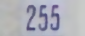

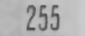

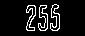

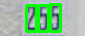

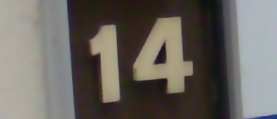

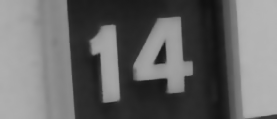

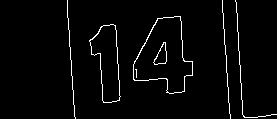

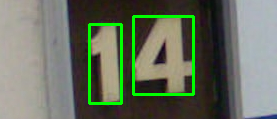

In [15]:
TestImage('testImages/270.png')
TestImage('testImages/105.png')

# Compute Accuracy

In [16]:
dataSet = loadDataSet('training.json')
percentages = LocalizeDir(dataSet)
print(f"\n\nAccuracy is: {round(sum(percentages)/len(percentages), 1)}%")

Loading: [==========] 100.0%

Accuracy is: 41.7%
